# **Chapter 3. Python 을 활용한 데이터 전처리** 





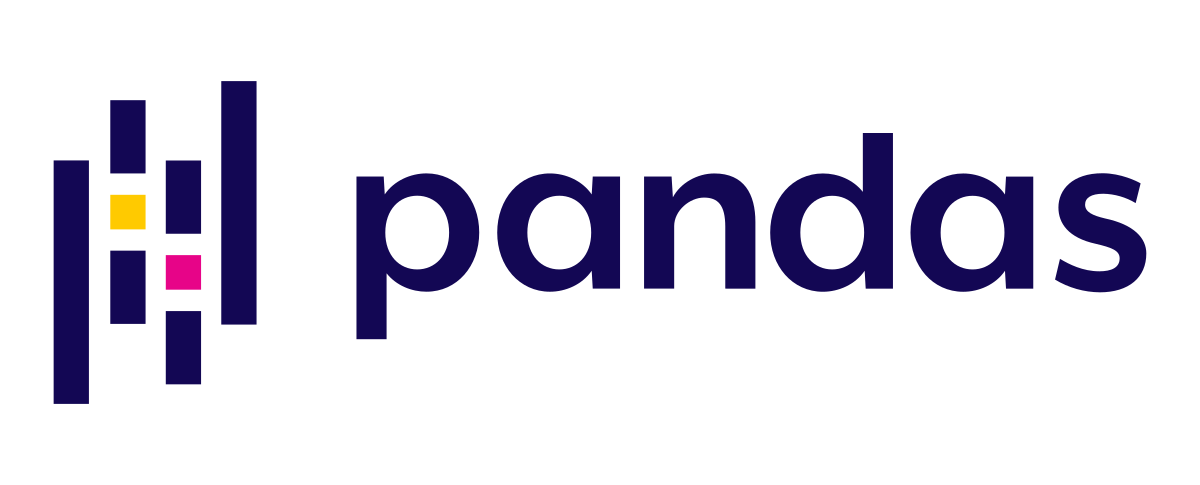


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> **3-13. Pandas 시각화로 멋지게 레포팅하자** <br>
> 3-14. 실습 예제 <br>

## 3-13. Pandas 시각화

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [1]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import seaborn as sns

# 폰트 설정
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
#fm._rebuild() 예전 버전
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
# 실습 파일 로딩 (펭귄, 타이타닉)
df1 = sns.load_dataset("penguins")
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# null 갯수 확인
df1.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# df1 = df1[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
df1 = df1.iloc[:, :5]
df1 = df1.dropna().reset_index(drop=True)  # 결측치 제거
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0
1,Adelie,Torgersen,39.5,17.4,186.0
2,Adelie,Torgersen,40.3,18.0,195.0
3,Adelie,Torgersen,36.7,19.3,193.0
4,Adelie,Torgersen,39.3,20.6,190.0
...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0
338,Gentoo,Biscoe,46.8,14.3,215.0
339,Gentoo,Biscoe,50.4,15.7,222.0
340,Gentoo,Biscoe,45.2,14.8,212.0


In [7]:
# https://www.kaggle.com/datasets/yasserh/titanic-dataset
df2 = sns.load_dataset("titanic")
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
df2['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

> ###  **3-13-1. plot 함수**


> - `plot` 은 **데이터 집합을 도표나 그래프로 표시하는 것**을 의미합니다.
> - 파이썬에서는 matplotlib, seaborn, pyplot 등 **여러 라이브러리에서 시각화 코딩을 할때 자주 사용되는 개념**입니다.
> - Pandas 의 plot 은 **matplotlib 의 plot 을 임포트**해서 사용하는 것입니다.
> - Pandas 의 **`plot` 함수는 `kind` 라는 옵션** 으로 **다양한 그래프를 시각화** 할 수 있습니다.
> - `kind` 옵션 인자값
    - 라인형(`line`), 바형 (`bar`),  히스토그램(`hist`), 박스형(`box`), 파이형(`pie`), 산점도(`scatter`), 영역형(`area`)  

> https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.DataFrame.plot.html?highlight=dataframe%20plot#pandas.DataFrame.plot

> **1. 꺽은선 그래프 (`line`)** - 수치형 데이터의 값 변화 표현

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
dtypes: float64(3), object(2)
memory usage: 13.5+ KB


<Axes: title={'center': '펭귄 라인 그래프'}>

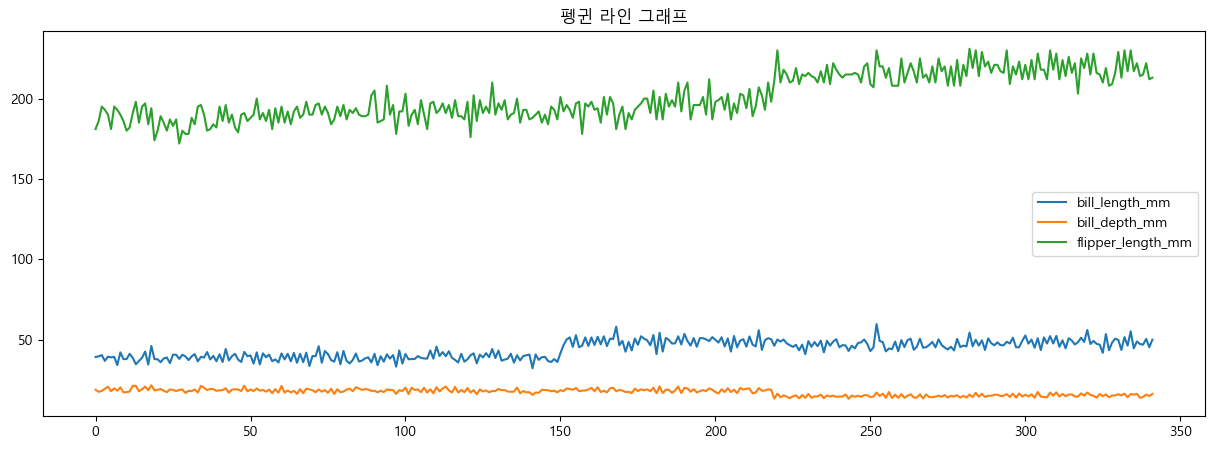

In [10]:
df1.plot(kind='line', figsize=(15,5), title='펭귄 라인 그래프')

<Axes: title={'center': '펭귄 날개(지느러미) 길이'}>

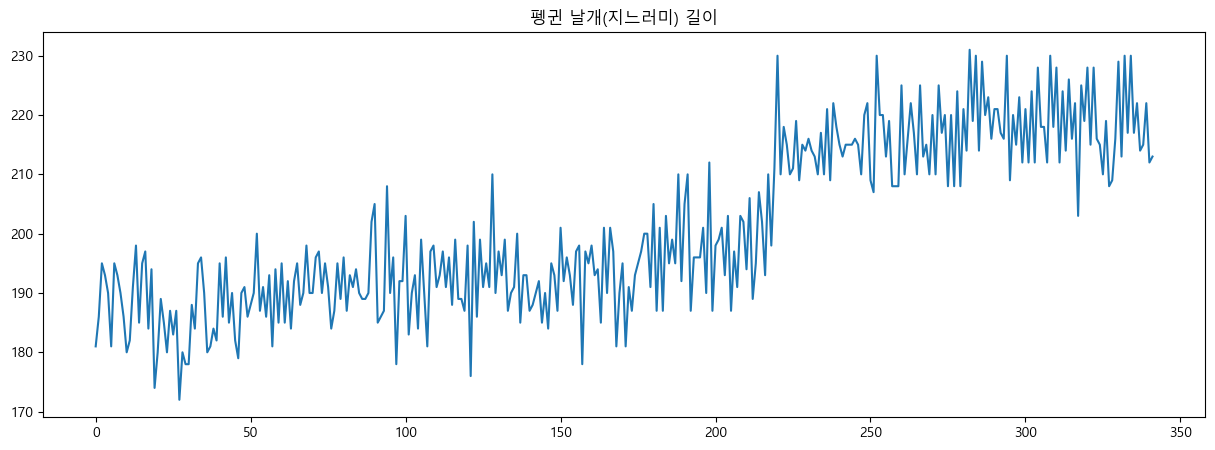

In [11]:
df1['flipper_length_mm'].plot(kind='line', figsize=(15,5), title='펭귄 날개(지느러미) 길이')

> **2. 막대 그래프 (`bar`)** - 범주형 데이터의 수치를 확인

In [12]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0
1,Adelie,Torgersen,39.5,17.4,186.0
2,Adelie,Torgersen,40.3,18.0,195.0
3,Adelie,Torgersen,36.7,19.3,193.0
4,Adelie,Torgersen,39.3,20.6,190.0
...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0
338,Gentoo,Biscoe,46.8,14.3,215.0
339,Gentoo,Biscoe,50.4,15.7,222.0
340,Gentoo,Biscoe,45.2,14.8,212.0


In [13]:
df1.value_counts()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm
Adelie   Biscoe  34.5            18.1           187.0                1
                 35.0            17.9           190.0                1
                                                192.0                1
                 35.3            18.9           187.0                1
                 35.5            16.2           195.0                1
                                                                    ..
Gentoo   Biscoe  53.4            15.8           219.0                1
                 54.3            15.7           231.0                1
                 55.1            16.0           230.0                1
                 55.9            17.0           228.0                1
                 59.6            17.0           230.0                1
Name: count, Length: 342, dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
dtypes: float64(3), object(2)
memory usage: 13.5+ KB


In [15]:
# df1 =df1.drop(columns=['island'])
# bar_df = df1.groupby('species').mean()  # island(mean을 구할 수 없음)를 삭제하고 평균을 구하면 됨

In [ ]:
# 위에 방법 이외의 추가으로 평균 구하는 방법
# bar_df = df1.groupby(df1.species)[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].mean()
bar_df = df1.groupby('species').mean(numeric_only=True) # numeric_only=True는 숫자 열만 포함하여 연산을 수행하도록 강제
bar_df

,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,
Adelie,38.791391,18.346358,189.953642
Chinstrap,48.833824,18.420588,195.823529
Gentoo,47.504878,14.982114,217.186992


<Axes: title={'center': '펭귄종 별 평균'}, xlabel='species'>

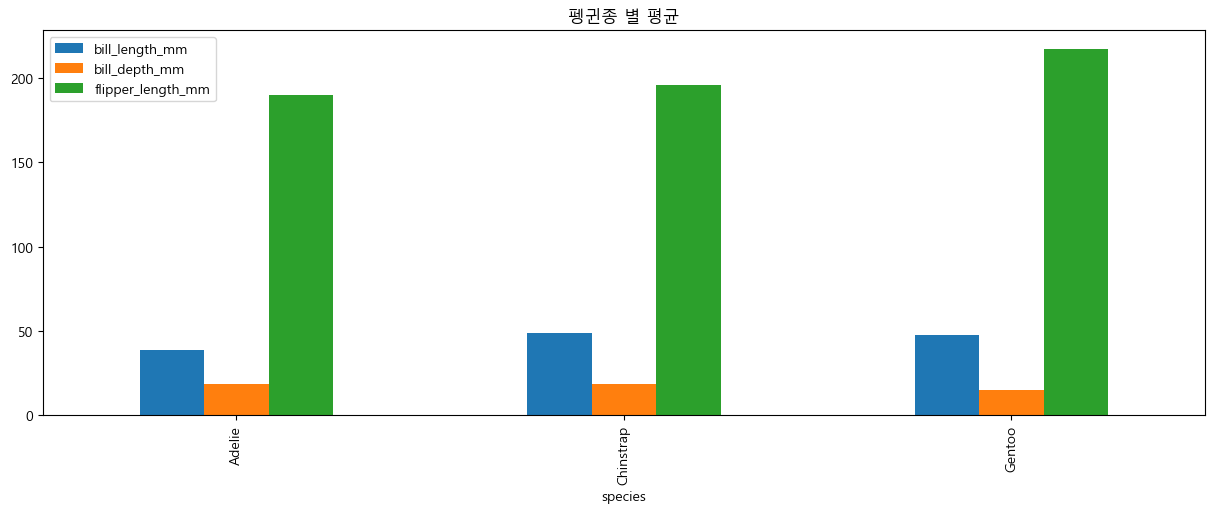

In [17]:
bar_df.plot(kind='bar', figsize=(15,5), title = '펭귄종 별 평균')

<Axes: title={'center': '펭귄 특성 별 평균'}>

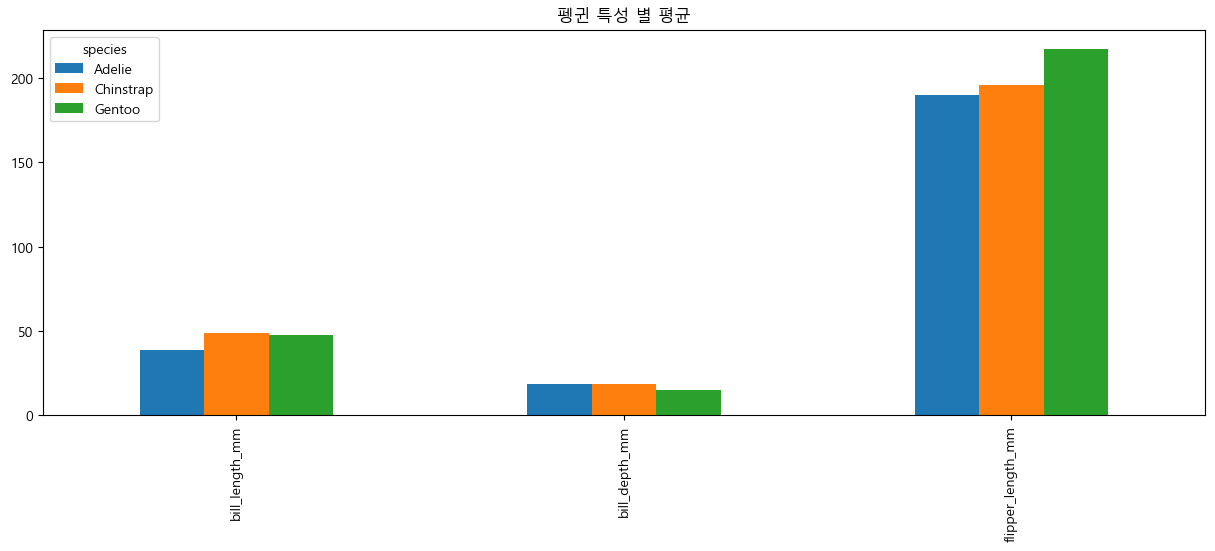

In [18]:
# 전치 연산
bar_df.T.plot(kind='bar', figsize=(15,5), title = '펭귄 특성 별 평균')

> **3. 히스토그램 (`hist`)** - 연속형 데이터 표현

<Axes: title={'center': '펭귄 특성 별 빈도수'}, ylabel='Frequency'>

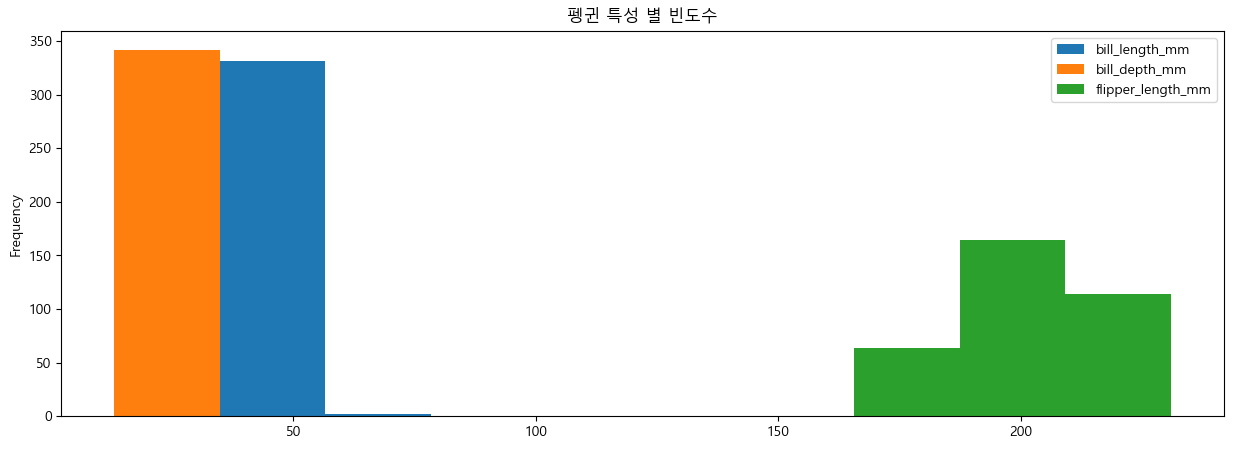

In [19]:
df1.plot(kind='hist', figsize=(15,5), title = '펭귄 특성 별 빈도수')

<Axes: title={'center': '펭귄 특성 별 빈도수'}, ylabel='Frequency'>

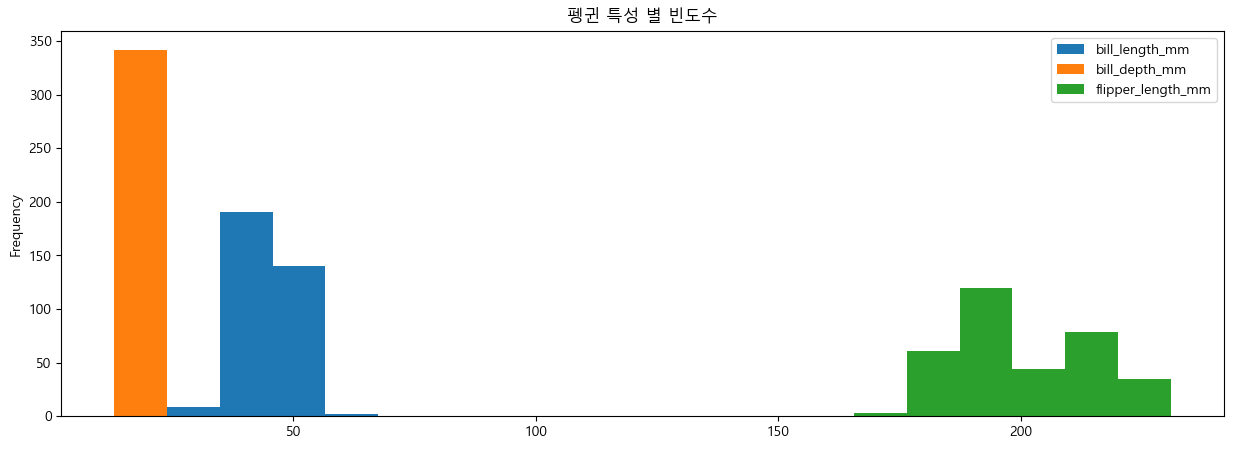

In [20]:
# 빈(bin) 개수 지정
df1.plot(bins=20, kind='hist', figsize=(15,5), title = '펭귄 특성 별 빈도수')

> **3. 박스 (`box`)** - 자료의 특성을 한눈에 파악하고 이상치 확인

<Axes: title={'center': '펭귄 특성별 값 범위'}>

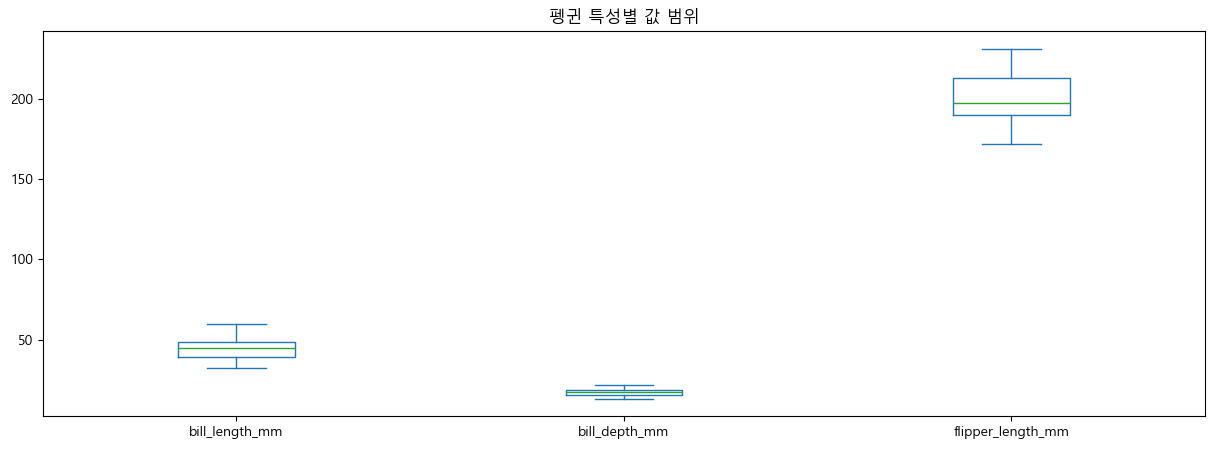

In [21]:
df1.plot(kind='box', figsize=(15,5), title = '펭귄 특성별 값 범위')

> **3. 파이 (`pie`)** - 비율로 데이터 표현

In [22]:
# 선실별 승객 수
pie_df = df2['pclass'].value_counts()

<Axes: title={'center': '선실 별 승객 수 비율'}, ylabel='count'>

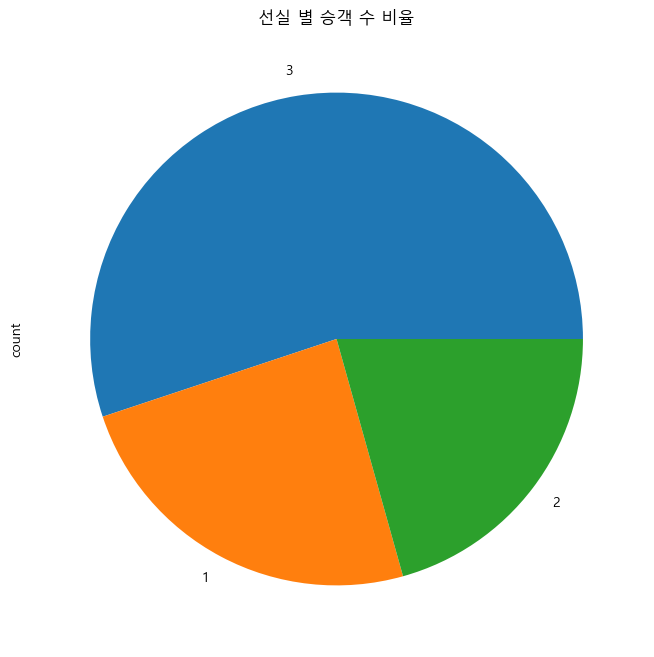

In [23]:
pie_df.plot(kind='pie', figsize=(15,8), title = '선실 별 승객 수 비율')

<Axes: title={'center': '선실 별 승객 수 비율'}, ylabel='count'>

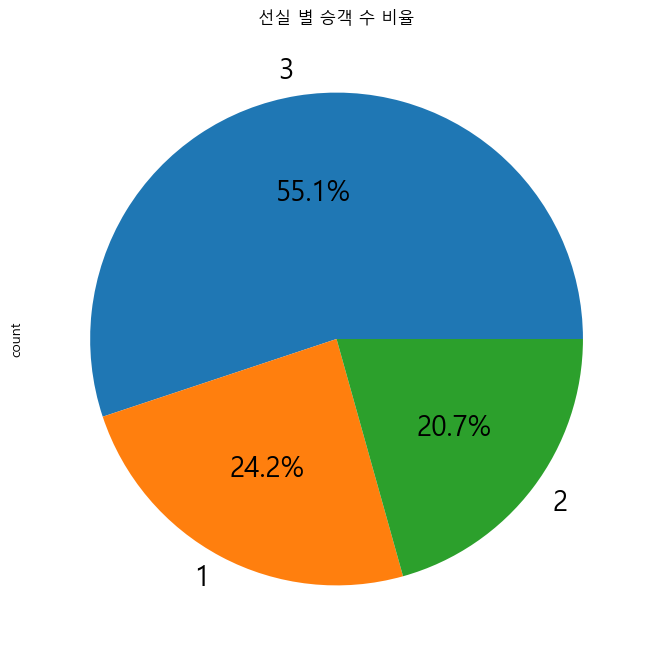

In [24]:
# 레이블 추가
pie_df.plot(kind='pie', figsize=(15,8), title = '선실 별 승객 수 비율', autopct='%.1f%%', fontsize=20)

> **4. 산점도 (`scatter`)** - 두 변수의 관계 표현

In [25]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: title={'center': '나이에 따른 타이타닉 승선 요금'}, xlabel='age', ylabel='fare'>

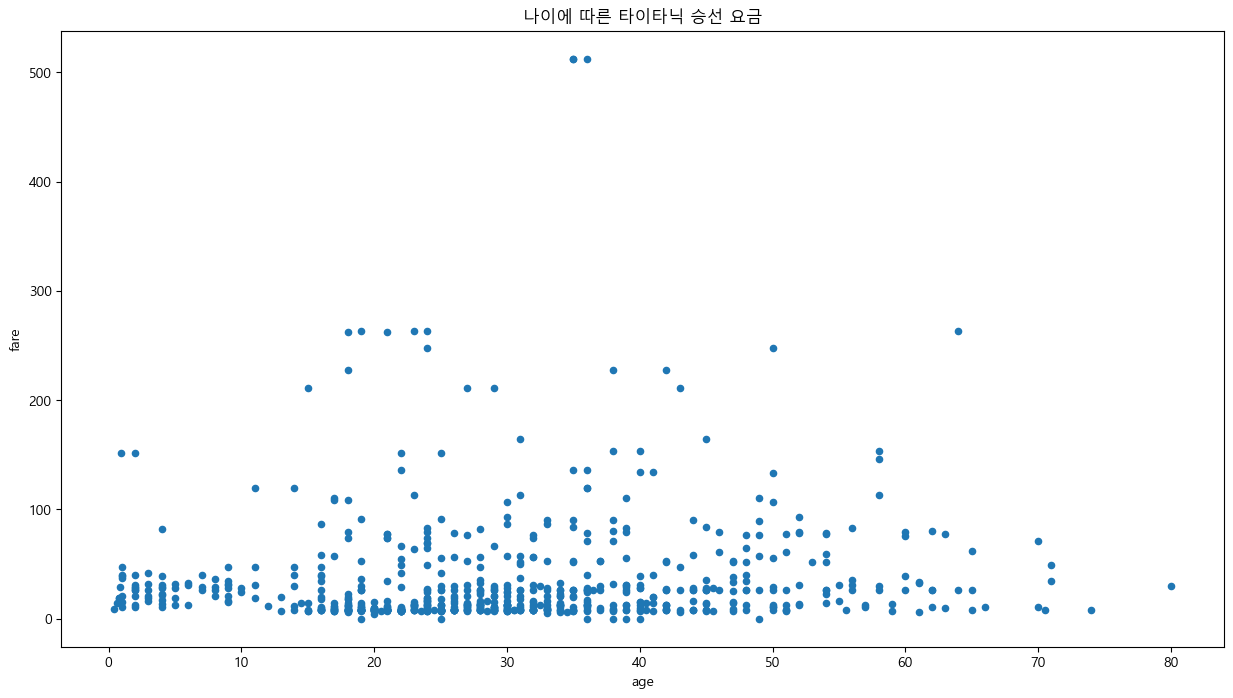

In [26]:
# 나이에 따른 타이타닉 승선 요금 시각화
df2.plot(kind='scatter', figsize=(15,8) , x='age', y='fare', title='나이에 따른 타이타닉 승선 요금')

<Axes: title={'center': '나이에 따른 타이타닉 승선 요금'}, xlabel='age', ylabel='fare'>

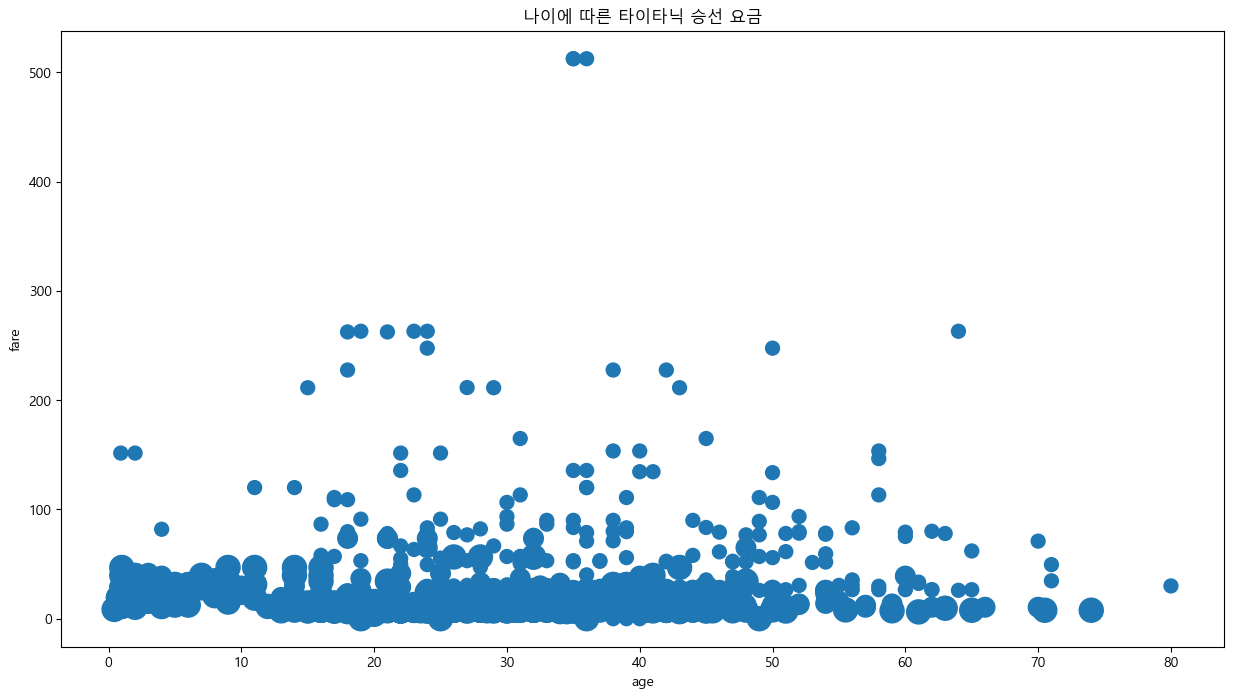

In [27]:
# 버블차트 (선실 정보 추가)
df2.plot(kind='scatter', figsize=(15,8) , x='age', y='fare', title='나이에 따른 타이타닉 승선 요금', s=df2['pclass']*100)